In [3]:
# !pip install datasets
# !pip install transformers
# !pip install evaluate
# !pip install torch


In [4]:
import numpy as np
import pandas as pd

In [5]:
url = "https://raw.githubusercontent.com/nsube/Spam_ham_detection/refs/heads/main/spam%20.csv"
df = pd.read_csv(url)

In [6]:
df.sample(5)

,Category,Message
2108,ham,Hmmm ... And imagine after you've come home fr...
1938,ham,The fact that you're cleaning shows you know w...
2200,ham,Not sure I have the stomach for it ...
1908,ham,ELLO BABE U OK?
5198,ham,She.s fine. I have had difficulties with her p...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.sample(5)

,Category,Message
5259,ham,Can help u swoop by picking u up from wherever...
4877,spam,lyricalladie(21/F) is inviting you to be her f...
581,ham,Huh so early.. Then ü having dinner outside iz...
3635,ham,Its a big difference. &lt;#&gt; versus &lt;...
3949,ham,I like to think there's always the possibility...


In [9]:
# renaming the cols
df.rename(columns={'Category':'target','Message':'text'},inplace=True)
df.sample(5)

,target,text
3526,ham,I not free today i haf 2 pick my parents up to...
2655,ham,Its sarcasm.. .nt scarcasim
3797,ham,They have a thread on the wishlist section of ...
4892,ham,Its worse if if uses half way then stops. Its ...
1712,ham,I got your back! Do you have any dislikes in bed?


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


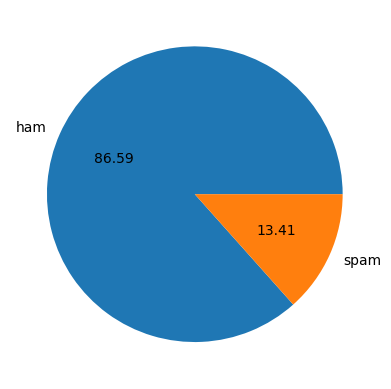

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
import nltk

In [17]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
df['num_characters'] = df['text'].apply(len)

In [19]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.368988,18.826992,2.004666
std,59.926946,13.853616,1.539516
min,2.000000,1.000000,1.000000
25%,35.750000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,122.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.448290,17.425699,1.846010
std,58.434864,14.118631,1.475377
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,137.989290,27.878179,3.029451
std,29.980287,7.036282,1.552198
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [24]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

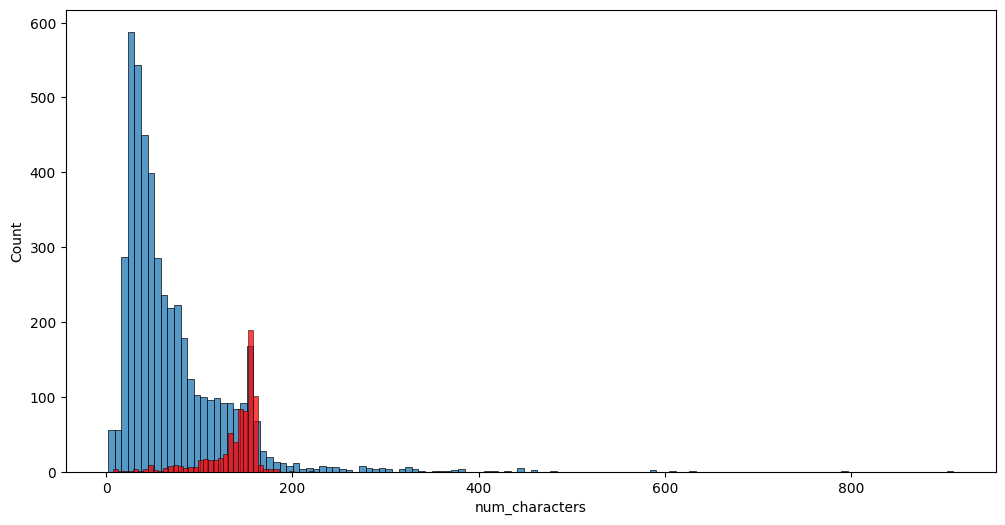

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

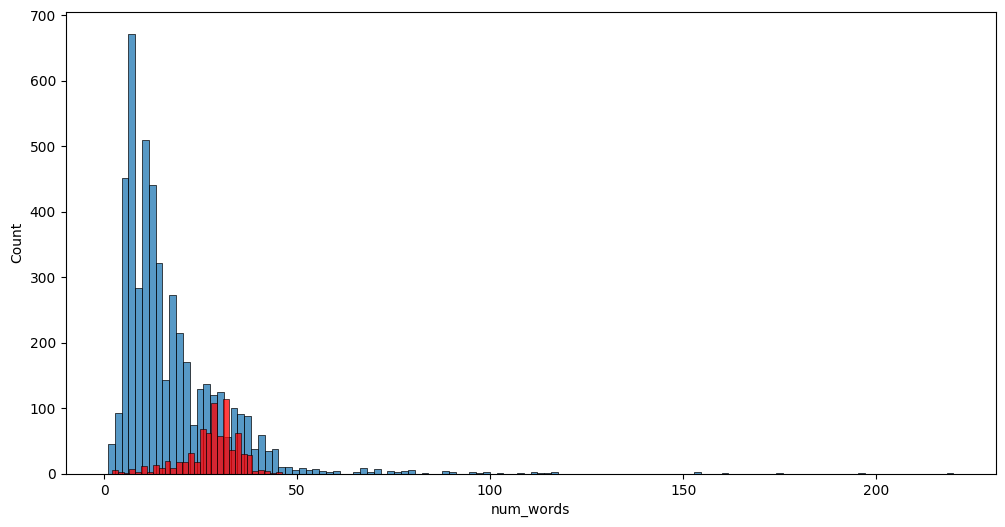

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

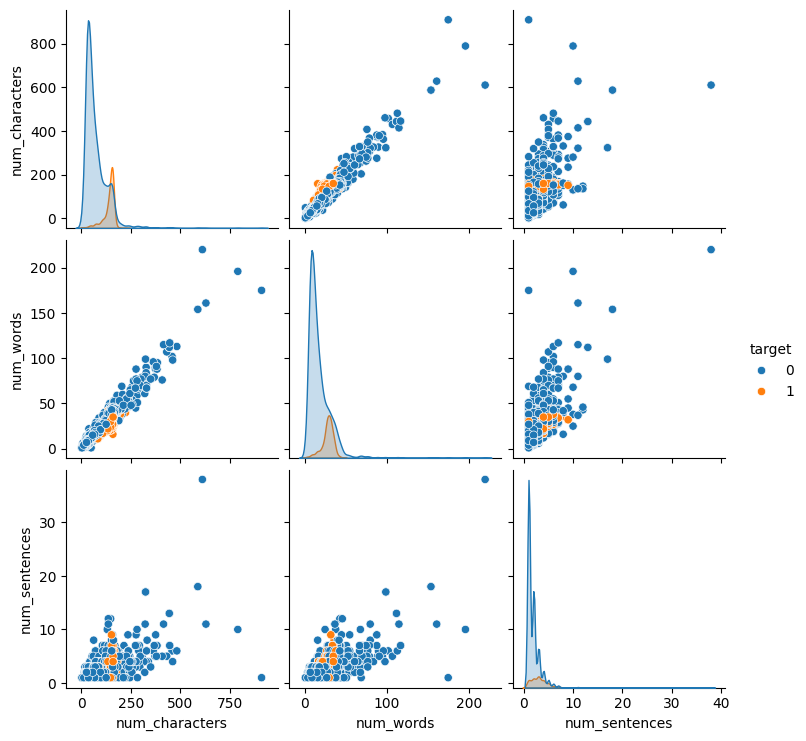

In [27]:
sns.pairplot(df,hue='target')

In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
print(df.columns)


Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')


In [29]:
X = tfidf.fit_transform(df['text']).toarray()

In [30]:
X.shape

(5572, 3000)

In [31]:
y = df['target'].values

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [34]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [35]:
gnb = GaussianNB()
mnb = MultinomialNB()


In [36]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("the accuracy score is ",accuracy_score(y_test,y_pred1))
print("the confusion matrix",confusion_matrix(y_test,y_pred1))
print("the precision score",precision_score(y_test,y_pred1))

the accuracy score is  0.8878923766816144
the confusion matrix [[851 106]
 [ 19 139]]
the precision score 0.5673469387755102


In [37]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("the accuracy score is ",accuracy_score(y_test,y_pred2))
print("the confusion matrix",confusion_matrix(y_test,y_pred2))
print("the precision score",precision_score(y_test,y_pred2))

the accuracy score is  0.967713004484305
the confusion matrix [[957   0]
 [ 36 122]]
the precision score 1.0


In [38]:
#
new_sms = ["Hi adam this is john ,how are you tomorrow we are going out so below is a link to access your gift card"]


new_sms_transformed = tfidf.transform(new_sms).toarray()


prediction = mnb.predict(new_sms_transformed)

# Print the result
print("Spam" if prediction[0] == 1 else "Not Spam")


Not Spam


In [39]:

new_sms = ["Congrats ,you have won a free gift card"]


new_sms_transformed = tfidf.transform(new_sms).toarray()


prediction = mnb.predict(new_sms_transformed)

print("Spam" if prediction[0] == 1 else "Not Spam")


Spam


In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


y_pred =mnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

TN, FP, FN, TP = cm.ravel()
fpr = FP / (FP + TN)
print("False Positive Rate (FPR): {:.2%}".format(fpr))


Confusion Matrix:
 [[957   0]
 [ 36 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       957
           1       1.00      0.77      0.87       158

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.967713004484305
False Positive Rate (FPR): 0.00%


Confusion Matrix:
 [[851 106]
 [ 19 139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       957
           1       0.57      0.88      0.69       158

    accuracy                           0.89      1115
   macro avg       0.77      0.88      0.81      1115
weighted avg       0.92      0.89      0.90      1115

Accuracy: 0.8878923766816144
False Positive Rate (FPR): 11.08%


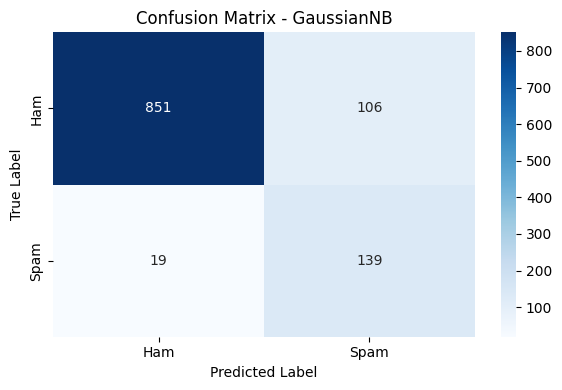

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


y_pred =gnb.predict(X_test)
cm_gnb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_gnb)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

TN, FP, FN, TP = cm_gnb.ravel()
fpr = FP / (FP + TN)
print("False Positive Rate (FPR): {:.2%}".format(fpr))


import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels
labels = ['Ham', 'Spam']

# Plot heatmap for mnb
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix - GaussianNB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()



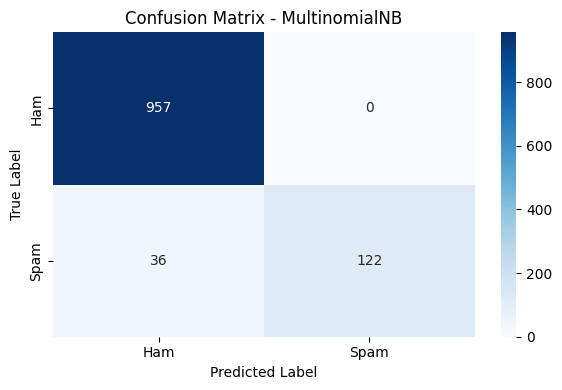

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels
labels = ['Ham', 'Spam']

# Plot heatmap for mnb
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix - MultinomialNB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


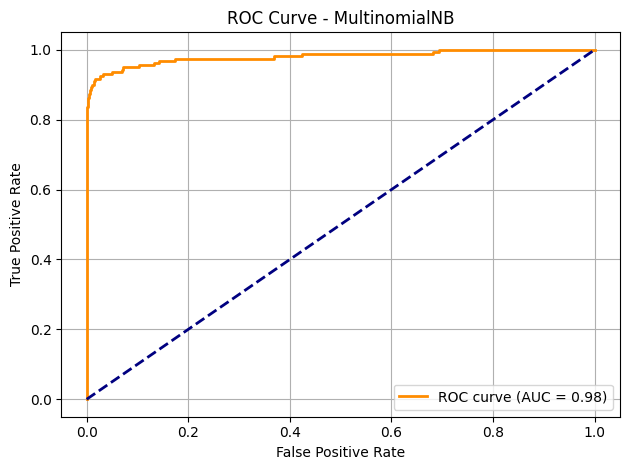

In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels (in case they're not 0/1)
y_test_bin = label_binarize(y_test, classes=[0, 1]).ravel()
y_score = mnb.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test_bin, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MultinomialNB')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


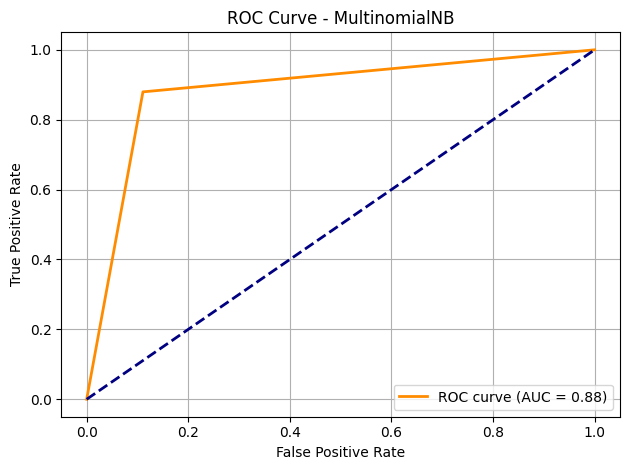

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels (in case they're not 0/1)
y_test_bin = label_binarize(y_test, classes=[0, 1]).ravel()
y_score = gnb.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test_bin, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MultinomialNB')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


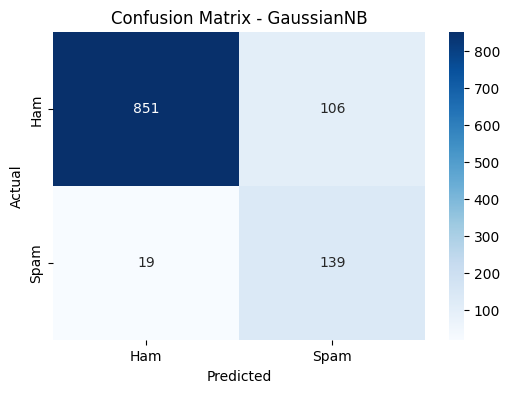

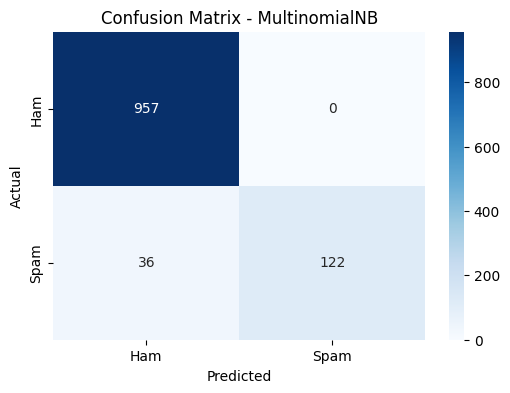


Performance Comparison:


,Accuracy,Precision (Spam),Recall (Spam),F1-Score (Spam),FPR
GaussianNB,88.79%,56.73%,87.97%,68.98%,11.08%
MultinomialNB,96.77%,100.00%,77.22%,87.14%,0.00%


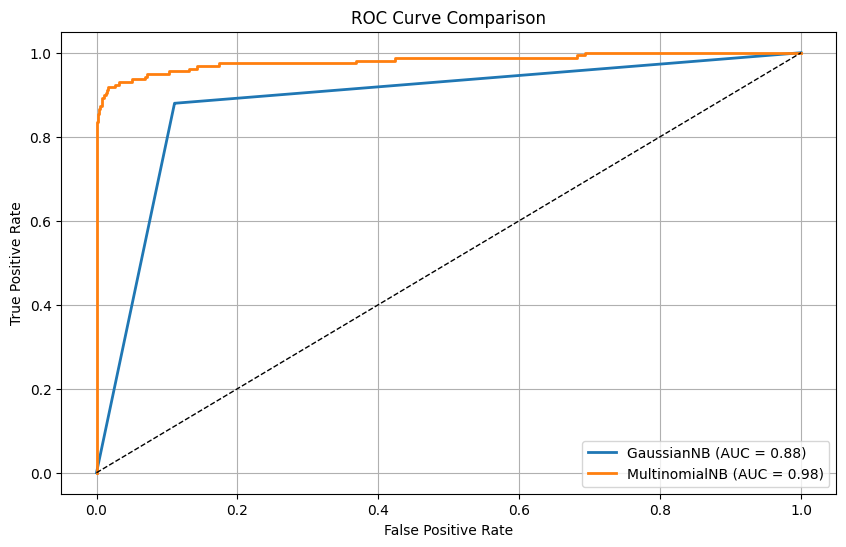

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# After training both models, add this comparison code:

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Spam)': report['1']['precision'],
        'Recall (Spam)': report['1']['recall'],
        'F1-Score (Spam)': report['1']['f1-score'],
        'FPR': cm[0][1]/(cm[0][1]+cm[0][0])
    }

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return metrics

# Evaluate both models
gnb_metrics = evaluate_model(gnb, X_test, y_test, 'GaussianNB')
mnb_metrics = evaluate_model(mnb, X_test, y_test, 'MultinomialNB')

# Create comparison table
comparison_df = pd.DataFrame([gnb_metrics, mnb_metrics],
                            index=['GaussianNB', 'MultinomialNB'])

print("\n\033[1mPerformance Comparison:\033[0m")
display(comparison_df.style.format("{:.2%}").set_caption("Model Comparison Table"))

# ROC Curve Comparison
plt.figure(figsize=(10,6))

for model, name in [(gnb, 'GaussianNB'), (mnb, 'MultinomialNB')]:
    y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [46]:
url = "https://raw.githubusercontent.com/nsube/Spam_ham_detection/refs/heads/main/spam%20.csv"
df = pd.read_csv(url)

In [47]:
df.rename(columns={'Category': 'v1', 'Message': 'v2'}, inplace=True)


In [48]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [50]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    641  Please call our customer service representativ...    4

In [51]:
df['label'] = df.v1.map({'ham':0, 'spam':1})

In [52]:
df

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [53]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

model_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [54]:
## test the model accuracy on sample data
#sample_data = df['v2'].to_list()[4000:4100]
#sample_labels = df['label'].to_list()[4000:4100]

In [58]:
from datasets import Dataset
def tokenize_function(examples):
    return tokenizer(examples["v2"], padding="max_length", truncation=True)
tokenized_datasets_train = train_dataset.map(tokenize_function, batched=True)
tokenized_datasets_eval = eval_dataset.map(tokenize_function, batched=True)
tokenizer_datasets_test = test_dataset.map(tokenize_function, batched=True)


train_data_df = df.sample(700, random_state=42)
eval_data_df = df.sample(500, random_state=45)
train_dataset = Dataset.from_pandas(train_data_df)
eval_dataset = Dataset.from_pandas(eval_data_df)

test_data_df = df.iloc[4000:4100].copy()
test_data_df['label'] = test_data_df['v1'].map({'ham': 0, 'spam': 1})

test_dataset = Dataset.from_pandas(test_data_df[['v2', 'label']])

# Tokenize the test dataset
tokenizer_datasets_test = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [59]:
from transformers import TrainingArguments,Trainer
training_args = TrainingArguments(output_dir="test_trainer")


In [60]:
import numpy as np
import evaluate
metric = evaluate.load("accuracy")

In [61]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}


In [62]:
trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=tokenized_datasets_train,
    eval_dataset=tokenized_datasets_eval,
    compute_metrics=compute_metrics,
)

In [64]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=264, training_loss=0.035892490184668335, metrics={'train_runtime': 212.1887, 'train_samples_per_second': 9.897, 'train_steps_per_second': 1.244, 'total_flos': 552533216256000.0, 'train_loss': 0.035892490184668335, 'epoch': 3.0})

In [65]:
predictions_output = trainer.predict(tokenizer_datasets_test)
accuracy_score = compute_metrics((predictions_output.predictions,tokenizer_datasets_test['label']))
print(accuracy_score)

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}


In [68]:
import torch
def predict_custom_text(text):

    device = bert_model.device


    inputs = tokenizer(text, padding="max_length", truncation=True,
                      return_tensors="pt").to(device)

    # Set model to evaluation mode and disable gradient calculation
    bert_model.eval()
    with torch.no_grad():
        outputs = bert_model(**inputs)

    # Convert to probabilities
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predicted_class = torch.argmax(probs).item()

    return {
        "text": text,
        "label": "spam" if predicted_class == 1 else "ham",
        "spam_probability": probs[0][1].item(),
        "ham_probability": probs[0][0].item()
    }


In [69]:
predict_custom_text("Hey, I came across a new investment platform that helped me increase my savings. Thought you might want to check it out, here’s the link: investnow.com")

{'text': 'Hey, I came across a new investment platform that helped me increase my savings. Thought you might want to check it out, here’s the link: investnow.com',
 'label': 'spam',
 'spam_probability': 0.999390721321106,
 'ham_probability': 0.0006092186667956412}


Performance Comparison:


,Accuracy,Precision (Spam),Recall (Spam),F1-Score (Spam),FPR
BERT,100.00%,100.00%,100.00%,100.00%,0.00%
GaussianNB,88.79%,56.73%,87.97%,68.98%,11.08%
MultinomialNB,96.77%,100.00%,77.22%,87.14%,0.00%


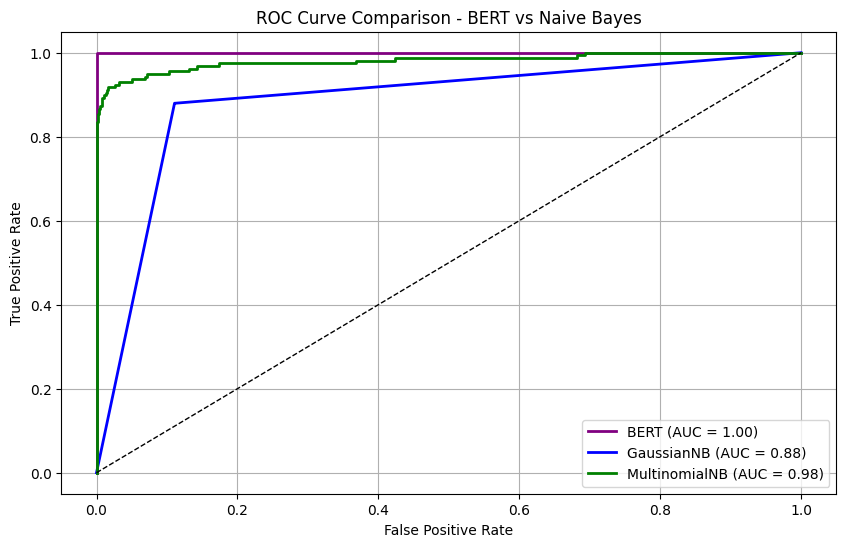

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# ----- BERT Evaluation -----
def evaluate_bert(predictions_output, true_labels):
    preds = predictions_output.predictions.argmax(axis=1)
    report = classification_report(true_labels, preds, output_dict=True)
    cm = confusion_matrix(true_labels, preds)

    metrics = {
        'Accuracy': accuracy_score(true_labels, preds),
        'Precision (Spam)': report['1']['precision'],
        'Recall (Spam)': report['1']['recall'],
        'F1-Score (Spam)': report['1']['f1-score'],
        'FPR': cm[0][1]/(cm[0][1]+cm[0][0])
    }

    return metrics, preds

# ----- Naive Bayes Evaluation -----
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Spam)': report['1']['precision'],
        'Recall (Spam)': report['1']['recall'],
        'F1-Score (Spam)': report['1']['f1-score'],
        'FPR': cm[0][1]/(cm[0][1]+cm[0][0])
    }


    return metrics, y_pred

# ----- Run all evaluations -----
bert_metrics, bert_preds = evaluate_bert(predictions_output, tokenizer_datasets_test['label'])
gnb_metrics, gnb_preds = evaluate_model(gnb, X_test, y_test, 'GaussianNB')
mnb_metrics, mnb_preds = evaluate_model(mnb, X_test, y_test, 'MultinomialNB')

# ----- Combine results -----
comparison_df = pd.DataFrame(
    [bert_metrics, gnb_metrics, mnb_metrics],
    index=['BERT', 'GaussianNB', 'MultinomialNB']
)

print("\n\033[1mPerformance Comparison:\033[0m")
display(comparison_df.style.format("{:.2%}").set_caption("Model Comparison Table"))

# ----- ROC Curve Plot -----
plt.figure(figsize=(10,6))

# ROC for BERT
bert_probs = predictions_output.predictions[:, 1]
fpr_bert, tpr_bert, _ = roc_curve(tokenizer_datasets_test['label'], bert_probs)
plt.plot(fpr_bert, tpr_bert, lw=2, label=f'BERT (AUC = {auc(fpr_bert, tpr_bert):.2f})', color='purple')

# ROC for GNB and MNB
for model, name, color in zip([gnb, mnb], ['GaussianNB', 'MultinomialNB'], ['blue', 'green']):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})', color=color)

plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - BERT vs Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [71]:
new_sms = [
    "Hi adam this is john ,how are you tomorrow we are going out so below is a link to access your gift card",  # Potential spam
    "Congratulations! You've been selected to win a free vacation!",  # Spam
    "Please confirm the time for our meeting tomorrow.",  # Ham
    "Act fast! Limited time offer – get your free trial today!",  # Spam
    "Can you send me the latest report before the end of the day?",  # Ham
    "URGENT: Your account has been suspended due to suspicious activity. Click here to verify your identity.",  # Spam
    "Let's catch up soon, it's been a while!",  # Ham
    "Special offer! Get 50% off if you buy now. Limited stock available.",  # Spam
    "Dinner at my place tomorrow, 7 PM. Hope you can make it.",  # Ham
    "Get your free gift card worth $100 by signing up now! Don't miss out!",  # Spam
]


In [72]:
new_sms_transformed = tfidf.transform(new_sms).toarray()

prediction = mnb.predict(new_sms_transformed)

# Print the results
for i, msg in enumerate(new_sms):
    print(f"Message: {msg[:50]}... -> Prediction: {'Spam' if prediction[i] == 1 else 'Not Spam'}")


Message: Hi adam this is john ,how are you tomorrow we are ... -> Prediction: Not Spam
Message: Congratulations! You've been selected to win a fre... -> Prediction: Spam
Message: Please confirm the time for our meeting tomorrow.... -> Prediction: Not Spam
Message: Act fast! Limited time offer – get your free trial... -> Prediction: Not Spam
Message: Can you send me the latest report before the end o... -> Prediction: Not Spam
Message: URGENT: Your account has been suspended due to sus... -> Prediction: Not Spam
Message: Let's catch up soon, it's been a while!... -> Prediction: Not Spam
Message: Special offer! Get 50% off if you buy now. Limited... -> Prediction: Not Spam
Message: Dinner at my place tomorrow, 7 PM. Hope you can ma... -> Prediction: Not Spam
Message: Get your free gift card worth $100 by signing up n... -> Prediction: Not Spam


In [73]:
new_sms = [
    "Hi adam this is john ,how are you tomorrow we are going out so below is a link to access your gift card",  # Potential spam
    "Congratulations! You've been selected to win a free vacation!",  # Spam
    "Please confirm the time for our meeting tomorrow.",  # Ham
    "Act fast! Limited time offer – get your free trial today!",  # Spam
    "Can you send me the latest report before the end of the day?",  # Ham
    "URGENT: Your account has been suspended due to suspicious activity. Click the link below to verify your identity.",  # Spam
    "Let's catch up soon, it's been a while!",  # Ham
    "Special offer! Get 50% off if you buy now. Limited stock available.",  # Spam
    "Dinner at my place tomorrow, 7 PM. Hope you can make it.",  # Ham
    "Get your free gift card worth $100 by signing up now! Don't miss out!",  # Spam
]


# Predict using the custom function for each message
for msg in new_sms:
    prediction = predict_custom_text(msg)
    print(f"Message: {msg}")
    print(f"Prediction: {'Spam' if prediction['label'] == 'spam' else 'Not Spam'}\n")


Message: Hi adam this is john ,how are you tomorrow we are going out so below is a link to access your gift card
Prediction: Spam

Message: Congratulations! You've been selected to win a free vacation!
Prediction: Spam

Message: Please confirm the time for our meeting tomorrow.
Prediction: Not Spam

Message: Act fast! Limited time offer – get your free trial today!
Prediction: Spam

Message: Can you send me the latest report before the end of the day?
Prediction: Not Spam

Message: URGENT: Your account has been suspended due to suspicious activity. Click the link below to verify your identity.
Prediction: Spam

Message: Let's catch up soon, it's been a while!
Prediction: Not Spam

Message: Special offer! Get 50% off if you buy now. Limited stock available.
Prediction: Spam

Message: Dinner at my place tomorrow, 7 PM. Hope you can make it.
Prediction: Not Spam

Message: Get your free gift card worth $100 by signing up now! Don't miss out!
Prediction: Spam



In [74]:
import pandas as pd
from sklearn.metrics import accuracy_score

# New SMS messages
new_sms = [
    "Hey, I came across a new investment platform that helped me increase my savings. Thought you might want to check it out, here’s the link: investnow.com",
    "Congratulations! You've been selected to win a free vacation!",
    "Special offer! Get 50% off if you buy now. Limited stock available.",
    "Act fast! Limited time offer – get your free trial today!",
    "Can you send me the latest report before the end of the day?",
    "URGENT: Your account has been suspended due to suspicious activity. Click here to verify your identity.",
    "Let's catch up soon, it's been a while!",
    "Special offer! Get 50% off if you buy now. Limited stock available.",
    "Dinner at my place tomorrow, 7 PM. Hope you can make it.",
    "Get your free gift card worth $100 by signing up now! Don't miss out!",
]

true_labels = [1, 1, 1, 1, 0, 1, 0, 1, 0, 1]

# --- Transform and predict with MultinomialNB
new_sms_transformed = tfidf.transform(new_sms).toarray()
mnb_preds = mnb.predict(new_sms_transformed)

# --- Predict with BERT model
bert_preds = [1 if predict_custom_text(msg)["label"] == "spam" else 0 for msg in new_sms]


results = pd.DataFrame({
    'Message': new_sms,
    'True Label': true_labels,  # 0 for Not Spam, 1 for Spam
    'MNB Prediction': mnb_preds,
    'BERT Prediction': bert_preds,
})

# --- Accuracy evaluation
mnb_accuracy = accuracy_score(true_labels, mnb_preds)
bert_accuracy = accuracy_score(true_labels, bert_preds)

# --- Show comparison table without index
print(results[['True Label', 'MNB Prediction', 'BERT Prediction']].to_string(index=False))

# --- Accuracy Scores
print("\n--- Accuracy Scores ---")
print(f"MNB Accuracy: {mnb_accuracy:.2f}")
print(f"BERT Accuracy: {bert_accuracy:.2f}")

# --- Determine which model did better
best_model = "MNB" if mnb_accuracy > bert_accuracy else "BERT"
print(f"\n{best_model} performed better on these messages.")


 True Label  MNB Prediction  BERT Prediction
          1               0                1
          1               1                1
          1               0                1
          1               0                1
          0               0                0
          1               0                1
          0               0                0
          1               0                1
          0               0                0
          1               0                1

--- Accuracy Scores ---
MNB Accuracy: 0.40
BERT Accuracy: 1.00

BERT performed better on these messages.
